<img src="https://i.pinimg.com/originals/ee/2e/24/ee2e246795a13abc1fe01b28776626ef.jpg" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> APRENDIZAJE AUTOMATICO CON PYTHON </font></h1>
<h1><font color="#7F000E" size=4> DENSITY BASED SPATIAL CLUSTERNIG OF APPLICATIONS-DBSCAN
 </font></h1>
<br>
<br>
<div style="text-align:right">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Curso 2290, Clases Lunes y Miercoles 20:00-22:30pm </font><br>
<font color="#7F000e" size=3> Cuarta Clase </font><br>
</div>

---

## DBDSCAN

DBSCAN es un algoritmo de clusterización muy famoso, ya que, a diferencia de otros algoritmos de clusterización como Kmean, DBSCAN es capaz de clusterizar de forma correcta formas de datos complejas

Los algoritmos basados ​​en densidad son buenos para encontrar regiones de alta densidad y valores atípicos. Se utiliza comúnmente para la detección de anomalías y la agrupación de conjuntos de datos no lineales.



El propio nombre DBSCAN nos indica cómo funciona el algoritmo. DBSCAN viene de las palabras Density Based Spatial Clustering of Applications, es decir, que se trata de un algoritmo de clusterización basado en la densidad.

En este sentido, la densidad se refiere al número de observaciones que disponemos en una misma zona. Para que te hagas una idea, en la siguiente imagen te incluyo dos zonas, una con densidad de puntos y otra sin ellos:

Sin embargo, si te paras a pensar, el concepto de densidad es un poco subjetivo. Porque, ¿cuántos puntos son necesarios para considear a una zona como «densa»? Y, ¿cómo de lejos pueden estar estos puntos entre sí?

Precisamente tanto el número de puntos para considerar una zona como densa, así como la distancia a la que se encuentran esos puntos son los dos hiperparámetros del modelo.

Entendido esto, veámos cómo funciona el algoritmo DBSCAN.

Qué es DBSCAN?


DBSCAN (agrupación espacial de aplicaciones con ruido basada en densidad) es un algoritmo de aprendizaje no supervisado basado en densidad. Calcula gráficos de vecinos más cercanos para encontrar valores atípicos y grupos de formas arbitrarias. Mientras que la agrupación de K-medias genera agrupaciones de forma esférica.

DBSCAN no requiere grupos K inicialmente. En cambio, requiere dos parámetros: eps y minPts.

* eps : es el radio de grupos específicos. Si la distancia entre dos puntos es menor o igual a esp, se considerarán sus vecinos.
* minPts : número mínimo de puntos de datos en un vecindario determinado para formar los grupos.
DBSCAN utiliza estos dos parámetros para definir un punto central, un punto fronterizo o un valor atípico.




## IMPORTAMOS LAS LIBERIAS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

## DATA


Estamos utilizando datos de segmentación de clientes del centro comercial de Kaggle. Contiene la edad, el sexo, los ingresos y la puntuación de gastos de los clientes. Usaremos estas funciones para crear varios grupos.

Primero, cargaremos el conjunto de datos usando pandas `read_csv`. Luego, seleccionaremos tres columnas ("Edad", "Ingresos anuales (k$)", "Puntuación de gastos (1-100)") para crear el marco de datos X_train .

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATASET_TOULOUSE_C4/Mall_Customers.csv')
df.head()
#X_train = df[['Edad', 'Ingresos anuales (k$)', 'Puntuación de gastos (1-100)']]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.shape

(200, 5)

In [7]:
X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

Ajustaremos X_train al algoritmo DBSCAN con eps 12.5 y min_sample 4. Después de eso, crearemos un DBSCAN_dataset a partir de X_train y crearemos una columna 'Cluster' usando clustering.labels_ .

In [12]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

Para visualizar la distribución de clústeres, usaremos value_counts() y lo convertiremos en un marco de datos.

Como puede ver, tenemos 5 grupos y 1 valor atípico. El grupo "0" tiene el tamaño más grande con 112 filas.



In [ ]:
DBSCAN_dataset.Cluster.value_counts().to_frame()


,Cluster
0,112
2,34
3,24
-1,18
1,8
4,4


En esta sección, usaremos la información anterior y visualizaremos el diagrama de dispersión.  

Hay dos gráficos: "Ingresos anuales frente a puntuación de gastos" e "Ingresos anuales frente a edad". Los grupos se definen por colores y los valores atípicos se definen como pequeños puntos negros.

La visualización muestra claramente cómo cada cliente es parte de uno de los 5 grupos, y podemos usar esta información para ofrecer ofertas de alto nivel a los clientes con grupos morados y ofertas más económicas a los clientes con grupos verde oscuro.

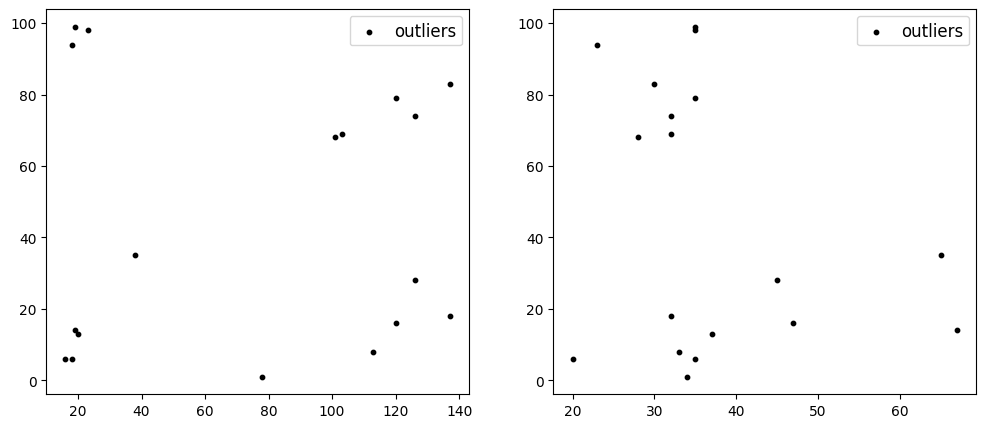

In [13]:
f1=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1]['Annual Income (k$)']
f2=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1]['Spending Score (1-100)']
f3=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1]['Age']
f4=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1]['Spending Score (1-100)']



outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

#sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

#sns.scatterplot('Age', 'Spending Score (1-100)',data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

#axes[0].scatter(f1,f2,c=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1].Cluster,s=10)
#axes[1].scatter(f3,f4,c=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1].Cluster,s=10)
###
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()



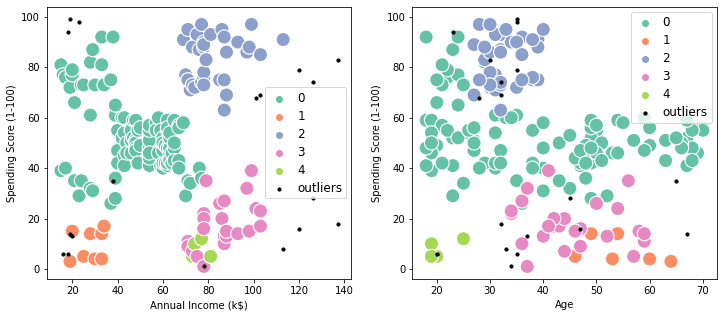

## CONCLUSION




DBSCAN es uno de los muchos algoritmos que se utilizan para la segmentación de clientes. Puede utilizar K-means o agrupación jerárquica para obtener resultados aún mejores. Los algoritmos de agrupación se utilizan generalmente para motores de recomendación, segmentación de mercados y clientes, análisis de redes sociales y análisis de documentos.

En este blog, hemos aprendido los conceptos básicos del algoritmo DBCAN basado en densidad y cómo podemos usarlo para crear segmentación de clientes utilizando scikit-learn. Puede mejorar el algoritmo encontrando eps y min_samples óptimos utilizando la puntuación de silueta y el mapa de calor.